Original Sudoku Grid:
[3, 0, 6, 5, 0, 8, 4, 0, 0]
[5, 2, 0, 0, 0, 0, 0, 0, 0]
[0, 8, 7, 0, 0, 0, 0, 3, 1]
[0, 0, 3, 0, 1, 0, 0, 8, 0]
[9, 0, 0, 8, 6, 3, 0, 0, 5]
[0, 5, 0, 0, 9, 0, 6, 0, 0]
[1, 3, 0, 0, 0, 0, 2, 5, 0]
[0, 0, 0, 0, 0, 0, 0, 7, 4]
[0, 0, 5, 2, 0, 6, 3, 0, 0]

Solved Sudoku Grid:
[3, 1, 6, 5, 7, 8, 4, 9, 2]
[5, 2, 9, 1, 3, 4, 7, 6, 8]
[4, 8, 7, 6, 2, 9, 5, 3, 1]
[2, 6, 3, 4, 1, 5, 9, 8, 7]
[9, 7, 4, 8, 6, 3, 1, 2, 5]
[8, 5, 1, 7, 9, 2, 6, 4, 3]
[1, 3, 8, 9, 4, 7, 2, 5, 6]
[6, 9, 2, 3, 5, 1, 8, 7, 4]
[7, 4, 5, 2, 8, 6, 3, 1, 9]

Time taken: 0.01402 seconds


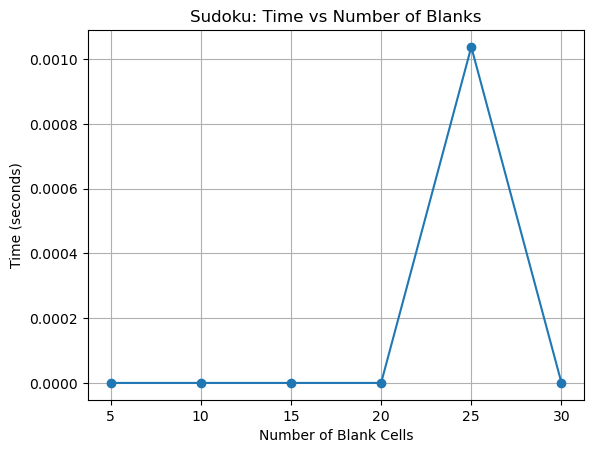

In [2]:
import time
import matplotlib.pyplot as plt

# Sudoku Solver using Backtracking
N = 9

def print_grid(grid):
    for row in grid:
        print(row)

def is_safe(grid, row, col, num):
    # Check row
    for x in range(N):
        if grid[row][x] == num:
            return False
    # Check column
    for x in range(N):
        if grid[x][col] == num:
            return False
    # Check 3x3 box
    start_row, start_col = row - row % 3, col - col % 3
    for i in range(3):
        for j in range(3):
            if grid[i + start_row][j + start_col] == num:
                return False
    return True

def solve_sudoku(grid):
    for row in range(N):
        for col in range(N):
            if grid[row][col] == 0:
                for num in range(1, 10):
                    if is_safe(grid, row, col, num):
                        grid[row][col] = num
                        if solve_sudoku(grid):
                            return True
                        grid[row][col] = 0
                return False
    return True

# Example Sudoku 
grid = [
    [3, 0, 6, 5, 0, 8, 4, 0, 0],
    [5, 2, 0, 0, 0, 0, 0, 0, 0],
    [0, 8, 7, 0, 0, 0, 0, 3, 1],
    [0, 0, 3, 0, 1, 0, 0, 8, 0],
    [9, 0, 0, 8, 6, 3, 0, 0, 5],
    [0, 5, 0, 0, 9, 0, 6, 0, 0],
    [1, 3, 0, 0, 0, 0, 2, 5, 0],
    [0, 0, 0, 0, 0, 0, 0, 7, 4],
    [0, 0, 5, 2, 0, 6, 3, 0, 0]
]

print("Original Sudoku Grid:")
print_grid(grid)

start = time.time()
solve_sudoku(grid)
end = time.time()

print("\nSolved Sudoku Grid:")
print_grid(grid)
print(f"\nTime taken: {end - start:.5f} seconds")

# Visualization
blanks = [5, 10, 15, 20, 25, 30]
times = []

for b in blanks:
    # make a grid with 'b' blanks
    test_grid = [row[:] for row in grid]
    c = 0
    for i in range(9):
        for j in range(9):
            if c < b:
                test_grid[i][j] = 0
                c += 1
    t1 = time.time()
    solve_sudoku(test_grid)
    t2 = time.time()
    times.append(t2 - t1)

plt.figure()
plt.plot(blanks, times, marker='o')
plt.title("Sudoku: Time vs Number of Blanks")
plt.xlabel("Number of Blank Cells")
plt.ylabel("Time (seconds)")
plt.grid(True)
plt.show()
